In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import training_testing_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Sample data
data = {
    'Yosh': [22, 35, 47, 52, 46, 25, 34, 41, 29, 50],
    'Staj': [1, 10, 20, 25, 18, 2, 9, 15, 4, 22],
    'Maosh': [200, 800, 1500, 1700, 1400, 250, 750, 1300, 400, 1600],
    'Sinf': ['Oddiy', 'Oddiy', 'Boy', 'Boy', 'Boy', 'Oddiy', 'Oddiy', 'Boy', 'Oddiy', 'Boy']
}
df = pd.DataFrame(data)

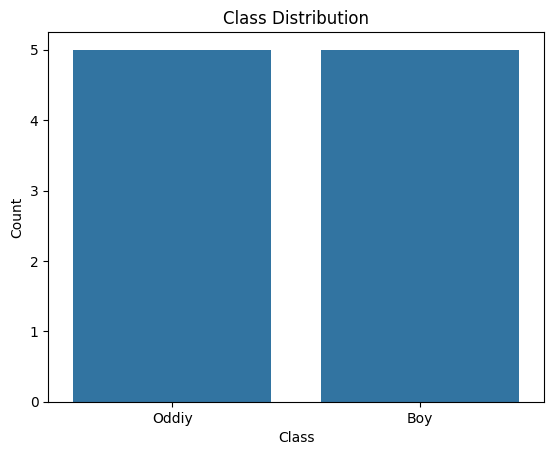

In [2]:
sns.countplot(data=df, x='Sinf')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

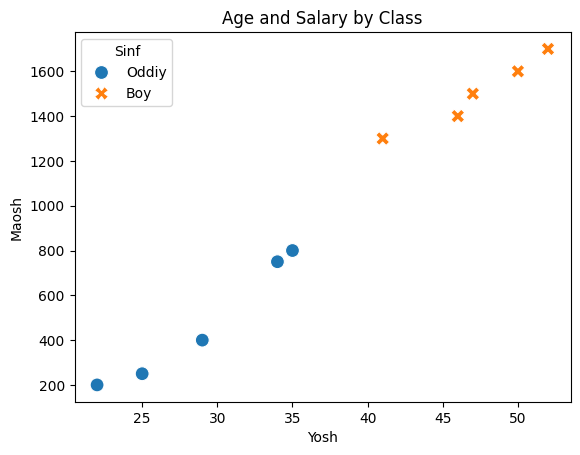

In [3]:
sns.scatterplot(data=df, x='Yosh', y='Maosh', hue='Sinf', style='Sinf', s=100)
plt.title("Age and Salary by Class")
plt.show()

In [4]:
# Prepare data
X = df[['Yosh', 'Staj', 'Maosh']]
y = df['Sinf'].map({'Oddiy': 0, 'Boy': 1})

# Split data
X_training, X_testing, y_training, y_testing = training_testing_split(X, y, testing_size=0.3, random_state=42)

# Create and training model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_training, y_training)

RandomForestClassifier(random_state=42)

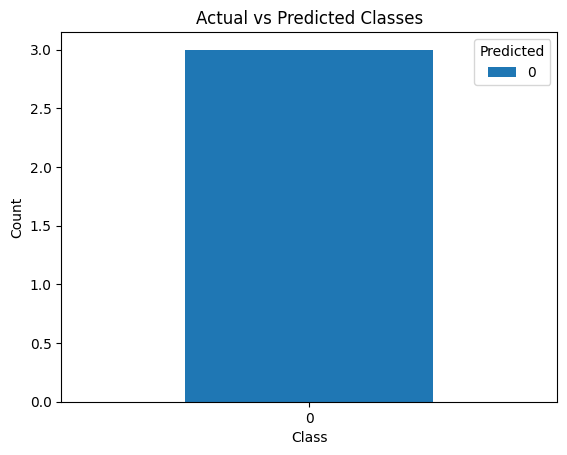

In [5]:
# Make predictions
y_pred = model.predict(X_testing)

# Compare predictions with actual values
comparison_df = pd.DataFrame({'Actual': y_testing.values, 'Predicted': y_pred})
comparison_df.value_counts().unstack().plot(kind='bar', rot=0)
plt.title("Actual vs Predicted Classes")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()